## 목차
1. 데이터 준비  
    [1-1. 라이브러리 불러오기](#라이브러리-불러오기)
    [1-2. 데이터 불러오기](#데이터-불러오기)
2. EDA
    [2-1. 데이터 구조 파악](#데이터-구조-파악하기)
    [2-2. 결측값 확인](#수동으로-결측값-확인)
        [2-2-1. 배송비](#배송비-결측값)
        [2-2-2. 숙소type](#숙소-type-결측값)
        [2-2-3. 국내/외국](#국내외국-숙소-결측값)
        [2-2-4. 광고](#광고-결측값)
    [2-3. 이상치 확인](#이상치-확인)

# 라이브러리 불러오기

In [29]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [30]:
df = pd.read_csv('C:/Users/sera/Desktop/노쇼핑_git/noshow_analyze/preprocessing/description_complete2.csv')
df.head()

,Unnamed: 0,platform,original_link,post_time,title,view_count,like_count,price,images,description,...,transaction_method,market_price,options,parking,check_in_time,check_out_time,stay_type,foreignn,event,advertise
0,0,당근마켓,https://www.daangn.com/articles/845853060,2024-10-10 10:27:51.013,10/11-12 금토) 호텔케니여수 스탠다드더블룸 양도해요,7,0,44000,https://img.kr.gcp-karroter.net/origin/article...,못 가게되서요 양도합니다,...,NaN,NaN,NaN,NaN,NaN,NaN,호텔,국내,NaN,False
1,1,당근마켓,https://www.daangn.com/articles/845851669,2024-10-10 10:24:51.013,●농심호텔 허심청브로이 옥토버페스트 수제맥주축제 OKTOBERFEST 티켓,29,2,28000,https://img.kr.gcp-karroter.net/origin/article...,농심호텔\n허심청브로이 옥토버페스트 수제맥주축제 \nOKTOBERFEST\n2024...,...,직거래,NaN,NaN,False,NaN,NaN,호텔,국내,NaN,False
2,2,당근마켓,https://www.daangn.com/articles/845850450,2024-10-10 10:22:51.013,호텔스카이파크센트럴 판교 10/12(토)~13(일),21,0,100000,https://img.kr.gcp-karroter.net/origin/article...,환불불가 상품으로\n개인사정으로 못가게 되어서 팝니다\n객실만이에요\n조식 미포함\...,...,NaN,NaN,조식 미포함,False,15:00,12:00,호텔,국내,NaN,False
3,3,당근마켓,https://www.daangn.com/articles/845834566,2024-10-10 09:54:51.013,신라호텔 더 파크뷰 레스토랑 식사권 2매 판매합니다,87,6,360000,https://img.kr.gcp-karroter.net/origin/article...,신라호텔 더 파크뷰 레스토랑 식사권 2매 판매합니다,...,NaN,NaN,NaN,NaN,NaN,NaN,호텔,국내,옥토버페스트,False
4,4,당근마켓,https://www.daangn.com/articles/845832050,2024-10-10 09:54:51.013,"호텔 드포레 ""주말"" 숙박권 (~11-30) [네이처파크 무료]",354,33,100000,https://img.kr.gcp-karroter.net/origin/article...,스파밸리 호텔\n호텔 드포레\n친환경 힐링 숲속호텔\n(네이처파크 무료이용)\n주중...,...,직거래,NaN,NaN,True,15:00,11:00,리조트,국내,NaN,False


# 데이터 구조 파악하기

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1913 non-null   int64  
 1   platform            1913 non-null   object 
 2   original_link       1913 non-null   object 
 3   post_time           1913 non-null   object 
 4   title               1913 non-null   object 
 5   view_count          1913 non-null   int64  
 6   like_count          1913 non-null   int64  
 7   price               1913 non-null   int64  
 8   images              1913 non-null   object 
 9   description         1913 non-null   object 
 10  category            1913 non-null   object 
 11  status              1913 non-null   object 
 12  seller_location     355 non-null    object 
 13  city_goo            136 non-null    object 
 14  citydong            342 non-null    object 
 15  description_1       1913 non-null   object 
 16  expira

In [32]:
df.describe()

,Unnamed: 0,view_count,like_count,price,head_count,shipping_fee,market_price
count,1913.000000,1913.000000,1913.000000,1.913000e+03,575.000000,1912.000000,5.390000e+02
mean,956.000000,48.078411,0.780972,2.706155e+05,159.233043,10.198745,4.232697e+05
std,552.379851,210.025738,4.576021,3.386386e+05,2651.482765,261.872583,1.044400e+06
min,0.000000,1.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000e+00
25%,478.000000,10.000000,0.000000,7.500000e+04,2.000000,0.000000,1.200000e+05
50%,956.000000,16.000000,0.000000,1.800000e+05,2.000000,0.000000,2.400000e+05
75%,1434.000000,30.000000,0.000000,3.800000e+05,3.000000,0.000000,5.000000e+05
max,1912.000000,4927.000000,116.000000,5.000000e+06,45000.000000,10000.000000,2.200000e+07


In [33]:
# 필요 없는 열 제거
df=df.drop("Unnamed: 0",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   platform            1913 non-null   object 
 1   original_link       1913 non-null   object 
 2   post_time           1913 non-null   object 
 3   title               1913 non-null   object 
 4   view_count          1913 non-null   int64  
 5   like_count          1913 non-null   int64  
 6   price               1913 non-null   int64  
 7   images              1913 non-null   object 
 8   description         1913 non-null   object 
 9   category            1913 non-null   object 
 10  status              1913 non-null   object 
 11  seller_location     355 non-null    object 
 12  city_goo            136 non-null    object 
 13  citydong            342 non-null    object 
 14  description_1       1913 non-null   object 
 15  expiration_stdate   685 non-null    object 
 16  expira

In [34]:
df.isnull().sum()

platform                 0
original_link            0
post_time                0
title                    0
view_count               0
like_count               0
price                    0
images                   0
description              0
category                 0
status                   0
seller_location       1558
city_goo              1777
citydong              1571
description_1            0
expiration_stdate     1228
expiration_endate     1187
room_type              685
head_count            1338
shipping_fee             1
transaction_method     785
market_price          1374
options               1027
parking                637
check_in_time         1651
check_out_time        1651
stay_type                2
foreignn                 2
event                 1828
advertise                1
dtype: int64

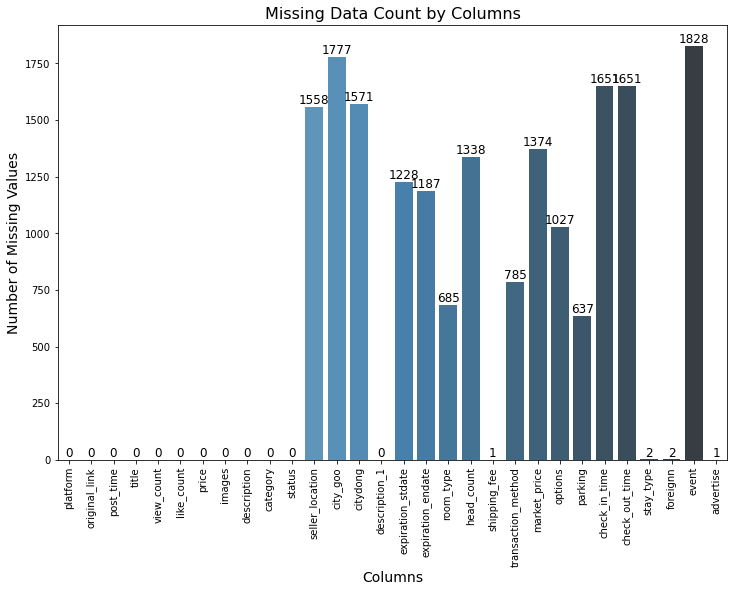

In [35]:
# 각 컬럼별 결측치 개수 계산
missing_data = df.isnull().sum()

# 결측치 개수를 Barplot으로 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=missing_data.index, y=missing_data.values, palette="Blues_d")

# 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

# 그래프 제목 및 라벨 설정
plt.title('Missing Data Count by Columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=90)  # 컬럼명이 길 경우 회전
plt.show()

# 수동으로 10개 미만의 결측값 확인 및 대치

# 배송비 결측값

In [36]:
df[df['shipping_fee'].isnull()==True]
df['shipping_fee'].fillna(0, inplace=True)

# 숙소 type 결측값

In [37]:
# NaN값이니까 0으로 대체
df[df['stay_type'].isnull()==True]
# index 112, 1038 모두 호텔
df['stay_type'].fillna('호텔', inplace=True)
df['stay_type'].iloc[[112, 1038]]

112     호텔
1038    호텔
Name: stay_type, dtype: object

# 국내/외국 숙소 결측값

In [38]:
df[df['foreignn'].isnull()==True]
# index 112, 1038 모두 부산으로 국내에 해당
df['foreignn'].fillna('국내', inplace=True)
df['foreignn'].iloc[[112, 1038]]

112     국내
1038    국내
Name: foreignn, dtype: object

# 광고 결측값

In [39]:
df[df['advertise'].isnull()==True]
# index 1038 광고 아님
df['advertise'].fillna(False, inplace=True)
df['advertise'].iloc[1038]

False

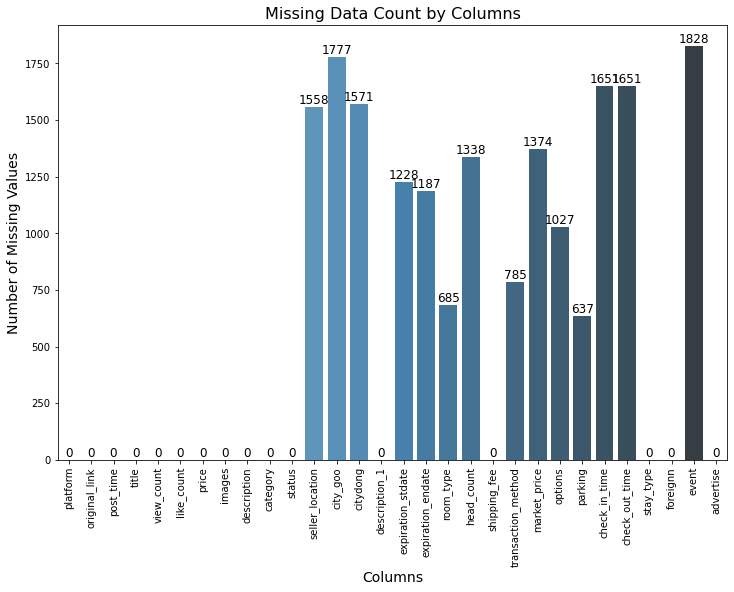

In [41]:
# 각 컬럼별 결측치 개수 계산
missing_data = df.isnull().sum()

# 결측치 개수를 Barplot으로 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=missing_data.index, y=missing_data.values, palette="Blues_d")

# 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

# 그래프 제목 및 라벨 설정
plt.title('Missing Data Count by Columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=90)  # 컬럼명이 길 경우 회전
plt.show()

# 이상치 확인

In [42]:
df['seller_location'].unique()

array(['담양군 금성면', '연제구 연산제2동', '광진구 구의제3동', '영등포구 여의동', '수성구 지산동',
       '전주시 덕진구 인후3동', '서귀포시 동홍동', '송파구 삼전동', '강남구 삼성동', '용산구 이태원제1동',
       '송파구 풍납동', '서대문구 창천동', '부산진구 개금동', '수원시 장안구 정자1동', '서구 남부민동',
       '군포시 당정동', '화성시 진안동', '중구 태평동', '성북구 보문동3가', '용인시 수지구 동천동',
       '정선군 사북읍', '중구 중림동', '서초구 서초4동', '용산구 이태원동', '김포시 마산동',
       '전주시 덕진구 인후동1가', '송파구 잠실동', '강남구 압구정동', '동작구 신대방제1동', '노원구 상계1동',
       '고양시 일산서구 일산동', '송파구 송파1동', '경주시 마동', '동구 일산동', '미추홀구 용현동',
       '군산시 조촌동', '서구 청라1동', '성남시 분당구 서현동', '동작구 사당제1동', '관악구 남현동',
       '강남구 일원동', '연제구 거제제3동', '금천구 가산동', '수원시 영통구 이의동', '고양시 덕양구 삼송동',
       '부산진구 양정동', '마포구 신공덕동', '군포시 산본동', '충주시 봉방동', nan, '관악구 인헌동',
       '기흥구 상하동', '강동구 명일제1동', '용산구 한강로동', '서구 화정2동', '중구 필동', '경주시 선도동',
       '강서구 방화제1동', '송파구 잠실2동', '여수시 둔덕동', '서귀포시 안덕면', '도봉구 창제5동',
       '용산구 용산2가동', '동남구 봉명동', '서구 아라동', '동구 용전동', '평택시 고덕면', '광주시 오포2동',
       '광주시 광남동', '송파구 방이1동', '마포구 합정동', '흥덕구 복대1동', '성북구 돈암제2동',
       '광진구 광장동', '마산합포구 월영동', '중

In [43]:
df['city_goo'].unique()

array([nan, '연제구', '광진구', '영등포구', '수성구', '덕진구', '송파구', '강남구', '용산구',
       '서대문구', '부산진구', '장안구', '서구', '중구', '성북구', '수지구', '서초구', '동작구',
       '노원구', '일산서구', '동구', '미추홀구', '분당구', '관악구', '금천구', '영통구', '덕양구',
       '마포구', '기흥구', '강동구', '강서구', '도봉구', '동남구', '흥덕구', '마산합포구', '은평구',
       '사하구', '연수구', '계양구', '부평구', '유성구', '일산동구', '성동구', '원미구', '성산구',
       '서북구', '상당구', '동대문구', '북구', '동래구', '중랑구', '남구', '남동구', '완산구',
       '수정구', '해운대구'], dtype=object)

In [45]:
df['citydong'].unique()

array([nan, '연산제2동', '구의제3동', '여의동', '지산동', '인후3동', '동홍동', '삼전동', '삼성동',
       '이태원제1동', '풍납동', '창천동', '개금동', '정자1동', '남부민동', '당정동', '진안동', '태평동',
       '동천동', '중림동', '서초4동', '이태원동', '마산동', '잠실동', '압구정동', '신대방제1동',
       '상계1동', '일산동', '송파1동', '마동', '용현동', '조촌동', '청라1동', '서현동', '사당제1동',
       '남현동', '일원동', '거제제3동', '가산동', '이의동', '삼송동', '양정동', '신공덕동', '산본동',
       '봉방동', '인헌동', '상하동', '명일제1동', '한강로동', '화정2동', '필동', '선도동', '방화제1동',
       '잠실2동', '둔덕동', '창제5동', '용산2가동', '봉명동', '아라동', '용전동', '오포2동', '광남동',
       '방이1동', '합정동', '복대1동', '돈암제2동', '광장동', '월영동', '소공동', '광복동', '삼성1동',
       '응암제2동', '하단제1동', '옥련2동', '행신2동', '소사동', '삼평동', '양재1동', '반포본동',
       '청파동', '계산1동', '삼산2동', '판교동', '황성동', '구즉동', '회현동', '오전동', '발산제1동',
       '선단동', '난곡동', '동탄3동', '식사동', '중1동', '송정동', '중동', '당산제2동', '반송동',
       '부성1동', '역삼1동', '성정1동', '성안동', '유덕동', '녹번동', '천호제3동', '답십리제1동',
       '용흥동', '수민동', '남목2동', '원종2동', '부전제1동', '영등포본동', '잠실본동', '신내1동',
       '경포동', '옥동', '망원제1동', '동문1동', '남촌도림동', '중앙동',

In [46]:
df['expiration_stdate'].unique()

array([nan, '2024-10-10', '2024-10-14', '2025-02-04', '2024-07-14',
       '2024-11-11', '2024-10-12', '2024-10-09', '2017-10-24',
       '2024-03-01', '2024-10-04', '2024-10-19', '2024-02-04',
       '2025-07-03', '2024-07-13', '2024-06-30', '2024-09-22',
       '2024-12-24', '2019-10-19', '2025-05-26', '2024-04-21',
       '2024-04-20', '2024-10-01', '2024-11-01', '2024-10-11',
       '2028-08-28', '2024-07-20', '2023-07-03', '2024-08-29',
       '2024-10-08', '2024-10-17', '2024-10-18', '2024-09-26',
       '2022-12-01', '2024-08-01', '2024-10-06', '2024-12-26',
       '2024-10-03', '2024-11-16', '2024-04-12', '2024-11-09',
       '2024-03-07', '2024-09-09', '2024-10-27', '2024-09-24',
       '2024-09-29', '2024-09-28', '2024-07-17', '2024-10-07',
       '2024-10-26', '2024-10-25', '2024-09-30', '2024-11-06',
       '2024-08-12', '2024-08-18', '2024-10-05', '2024-10-13',
       '2024-05-14', '2024-03-15', '2024-12-25', '2024-05-06',
       '2021-12-24', '2024-09-16', '2024-08-17', '

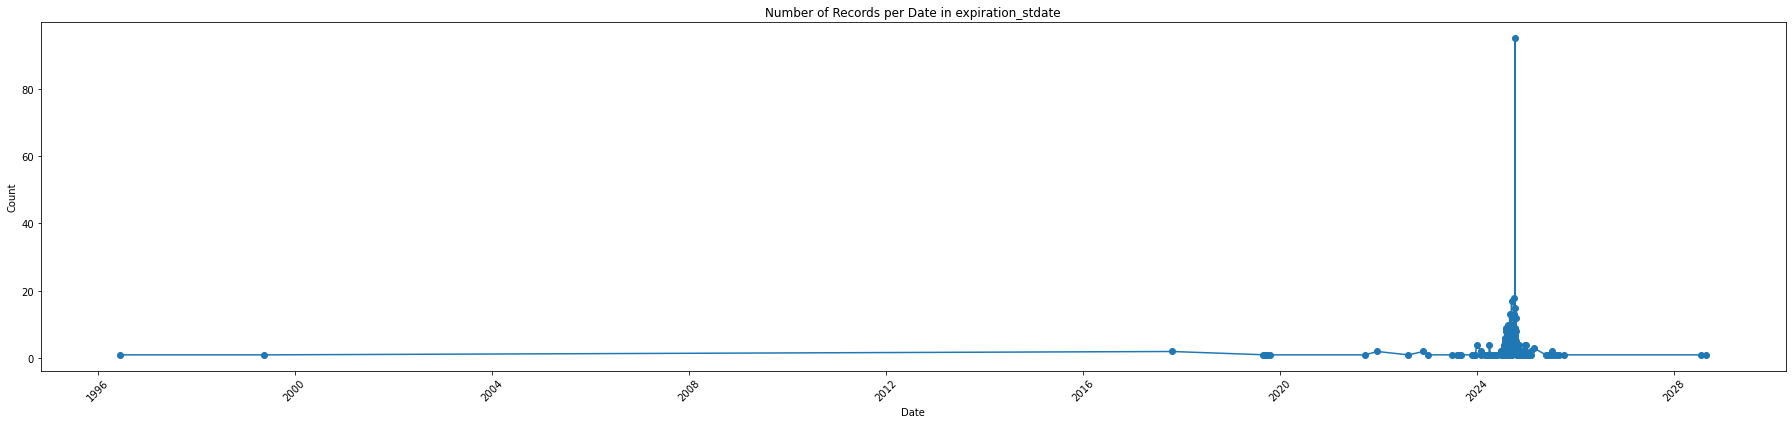

In [61]:
# 'expiration_stdate' 열을 datetime 형식으로 변환
df['expiration_stdate'] = pd.to_datetime(df['expiration_stdate'], errors='coerce')

# 날짜별 데이터 수 집계
date_counts = df['expiration_stdate'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(25, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Records per Date in expiration_stdate')
plt.xticks(rotation=45)  # X축 날짜 라벨 회전
plt.tight_layout()
plt.show()

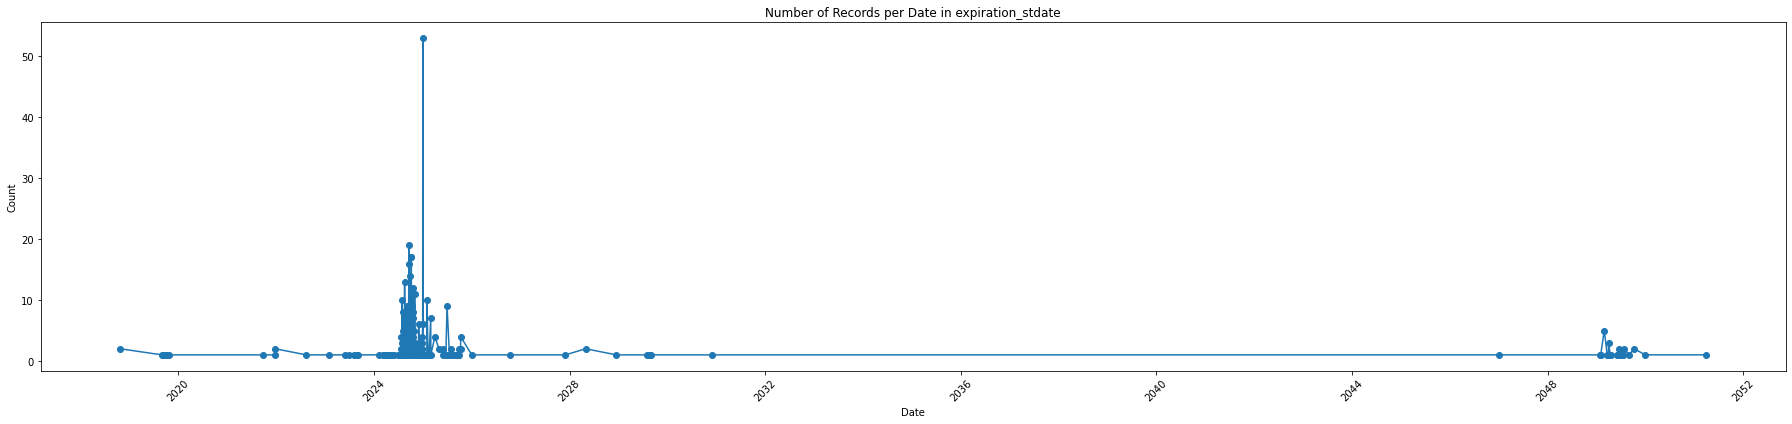

In [62]:
# 'expiration_stdate' 열을 datetime 형식으로 변환
df['expiration_endate'] = pd.to_datetime(df['expiration_endate'], errors='coerce')

# 날짜별 데이터 수 집계
date_counts = df['expiration_endate'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(25, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Records per Date in expiration_stdate')
plt.xticks(rotation=45)  # X축 날짜 라벨 회전
plt.tight_layout()
plt.show()

In [52]:
# 'expiration_stdate'와 'expiration_endate'를 datetime 형식으로 변환
df['expiration_stdate'] = pd.to_datetime(df['expiration_stdate'], errors='coerce')
df['expiration_endate'] = pd.to_datetime(df['expiration_endate'], errors='coerce')

# 시작 날짜가 끝 날짜보다 하루 이상 큰 경우 필터링
filtered_df = df[df['expiration_stdate'] >= (df['expiration_endate'] + pd.Timedelta(days=1))]

# 인덱스 저장
error_idx=filtered_df.index
error_idx

Int64Index([93, 195, 230, 1535, 1658, 1724, 1842], dtype='int64')

In [59]:
df[df.index.isin(error_idx)].loc[:,['title','description','post_time','expiration_stdate','expiration_endate']]
# 93은 expiration_endate가 2024-12-28로 변경
# 195는 expiration_endate가 2024-10-19로 변경
# 230은 post_time보다 유효기간이 짧다 -> 제거 필요 (10/10일 post된게 아니고 3달 전인데 크롤링이 잘못 된듯)
# 1535는 숙박 판매가 아니고 호텔 식사권이고 유효기간이 2024-06-30 (10/10일 post된게 아니고 8/8일에 올라옴. 크롤링이 잘못 된듯) -> 제거 필요
# 1658도 숙박 판매가 아니고 식사권이고 유효기간 지남(10/10일 post된게 아니고 8/1일에 올라옴. 크롤링이 잘못 된듯) -> 제거 필요 
# 1724도 10/10일 post된게 아니고 7/9일에 올라옴. 유효기간 지남 크롤링이 잘못 된듯 -> 제거 필요
# 1842도 10/10일 post된게 아니고 7/23일에 올라옴. 유효기간 지남 크롤링이 잘못 된듯 -> 제거 필요

# 93번은 expiration_endate를 2024-12-28로 변경
df.at[93, 'expiration_endate'] = '2024-12-28'

# 195번은 expiration_endate를 2024-10-19로 변경
df.at[195, 'expiration_endate'] = '2024-10-19'
# 나머지 잘못 기재된 행 제거
df.drop([230,1535,1658,1724,1842],axis=0,inplace=True)

In [60]:
df[df.index.isin(error_idx)]

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,...,transaction_method,market_price,options,parking,check_in_time,check_out_time,stay_type,foreignn,event,advertise
93,번개장터,https://bunjang.co.kr/products/293302038,2024-10-09 15:55:21.984,경주라한호텔 숙박권 12/28토요일 예약 팝니다,10,0,430000,https://media.bunjang.co.kr/product/293302038_...,경주라한호텔 숙박권 입니다\n조식+석식 포함이구요\n\n24.12.28토요일 예약 ...,여행/숙박/렌트,...,직거래,NaN,조식 포함,False,NaN,NaN,호텔,국내,NaN,False
195,번개장터,https://bunjang.co.kr/products/292262608,2024-10-04 10:55:21.985,켄싱턴 설악밸리 호텔 프리미어 로잔 10월 19일 조식 2인 숙박,11,0,329000,https://media.bunjang.co.kr/product/292262608_...,프리미어 로잔룸\n\n10월 19일 3시 입실\n\n조식 2인 포함,여행/숙박/렌트,...,직거래,210000.0,NaN,False,NaN,NaN,풀빌라,국내,NaN,False


In [63]:
df['expiration_endate'].unique()

array([                          'NaT', '2024-10-12T00:00:00.000000000',
       '2024-10-15T00:00:00.000000000', '2024-11-30T00:00:00.000000000',
       '2049-02-28T00:00:00.000000000', '2024-12-31T00:00:00.000000000',
       '2025-03-31T00:00:00.000000000', '2049-03-31T00:00:00.000000000',
       '2024-10-11T00:00:00.000000000', '2024-11-12T00:00:00.000000000',
       '2024-10-13T00:00:00.000000000', '2024-12-03T00:00:00.000000000',
       '2025-01-31T00:00:00.000000000', '2024-10-10T00:00:00.000000000',
       '2049-06-30T00:00:00.000000000', '2024-10-20T00:00:00.000000000',
       '2024-12-12T00:00:00.000000000', '2018-10-24T00:00:00.000000000',
       '2025-10-09T00:00:00.000000000', '2024-10-31T00:00:00.000000000',
       '2024-03-31T00:00:00.000000000', '2024-10-05T00:00:00.000000000',
       '2024-02-05T00:00:00.000000000', '2024-07-14T00:00:00.000000000',
       '2024-09-24T00:00:00.000000000', '2024-12-26T00:00:00.000000000',
       '2019-10-20T00:00:00.000000000', '2024-04-22

In [64]:
df['room_type'].unique()

array([nan, '스탠다드더블룸', '객실만', '디럭스 트윈 오션뷰', 'Standard Room', '디럭스트윈',
       '스탠다드 더블/트윈', '디럭스 스위트', '호텔', '수페리어', '일반룸', '레지던스', '1인식사권',
       '셀비아룸', '스위트룸', '싱글, 트윈', '빌라콘도 28평', '빌라콘도', '2인실', '2인1실',
       '인피니티풀2인 디럭스더블', '프리미엄 킹룸(남산뷰)', '슈페리어 트윈', '그랜드디럭스 시티뷰',
       '이그제큐티브 킹룸', 'Premier plus harbour view room', '프리미어룸',
       '메인디럭스 리버뷰', '패밀리 스탠다드', '해호텔', '슈페리얼 트윈 룸', '스위트커넥팅룸', '더 화이트 객실',
       '모텔', '프리미어 패밀리 트윈', '프리미엄 킹룸', 'deluxe room', '파노라마 스위트', '더파크뷰',
       '디럭스 2인실', '여성전용', '슈페리어 패밀리', '디럭스 씨 뷰 퀸룸', '그랜드워커힐 클럽스위트',
       '스탠다드방', '디럭스 킹&트윈(아차산뷰)', '주니어 스위트룸', '디럭스오션뷰', '원룸 스탠다드 더블',
       '객실', '비즈니스 디럭스 룸', '골져스오션더블 풀오션뷰', 'Premier deluxe', '고층 디럭스룸',
       '오션뷰 룸', '프리미어 디럭스 트윈', '스탠다드 더블', 'executive twin 더블,싱글침대 2개',
       '디럭스 더블룸', '조선호텔 숙박권 다크그린', '주니어 스위트', '원룸', '패밀리 타입', '디럭스 스위트룸',
       '프레지덴셜 스위트', '클래식룸', '디럭스/프리미어 리버뷰', '시그니처 스위트', '주니어스위트룸',
       'Standard', '투룸 슈페리얼 더블', '레이드백 스몰오션뷰', '디럭스 트윈룸', '프리미엄 디럭스',
       '마운틴뷰', '3인실', '